$${\color{yellow}{\text{Deep Learning for LLMs}}}$$



---

Load essential libraries

---

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
import gensim.downloader
import nltk
from nltk.tokenize import word_tokenize

---

Mount Google Drive folder if running Google Colab

---

In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/Workshop'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [3]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]])
print(X)
print(X.shape)
# X is a rank-2 tensor which is similar to a numpy 2D array
print(X[0]) # this is patient-0 info which is a rank-1 tensor
print(X[0, 2])

tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
torch.Size([6, 5])
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
tensor(37.3000)


---

**Convert a PyTorch object into a numpy array**

---

In [4]:
X_numpy = X.numpy()
print(X_numpy)
print(type(X_numpy))
print(X_numpy.shape)

[[ 72.  120.   37.3 104.   32.5]
 [ 85.  130.   37.  110.   14. ]
 [ 68.  110.   38.5 125.   34. ]
 [ 90.  140.   38.  130.   26. ]
 [ 84.  132.   38.3 146.   30. ]
 [ 78.  128.   37.2 102.   12. ]]
<class 'numpy.ndarray'>
(6, 5)


---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

In [5]:
# Vector addition
print(X[1, :] + X[2, :])

# Vector subtraction
print(X[1, :] - X[2, :]) # how different patient-1 and patient-2 are

# Scalar-vector multiplication
print(X[:, 2])
print((9/5)*X[:, 2] + 32)

# Average patient
print((1/6)*(X[0, :] + X[1, :] + X[2, :] + X[3, :] + X[4, :] + X[5, :]))
print(torch.mean(X, dim = 0)) # dim = 0 means top-to-bottom operation or each row is an element

tensor([153.0000, 240.0000,  75.5000, 235.0000,  48.0000])
tensor([ 17.0000,  20.0000,  -1.5000, -15.0000, -20.0000])
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])
tensor([ 99.1400,  98.6000, 101.3000, 100.4000, 100.9400,  98.9600])
tensor([ 79.5000, 126.6667,  37.7167, 119.5000,  24.7500])
tensor([ 79.5000, 126.6667,  37.7167, 119.5000,  24.7500])


---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [6]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [7]:
print(model['cricket'])
print(model['football'])
a = model['cricket'] - model['tendulkar']
b = model['football'] - model['messi']
print(a)
print(b)

[-1.2233    -0.28292   -1.7429     0.56621   -0.13787   -0.88088
 -0.26887    0.41893    0.94977   -0.61332    0.0092522  1.0045
 -0.89004   -0.55148    0.61202    0.42256    0.92935    0.83307
 -1.5568     0.084345  -0.018224   0.84803    0.68321    0.97059
  0.26561   -1.0538     0.40724   -0.45079   -0.89013    0.94153
  2.2055     0.75363    0.5166     0.47977    0.86824    0.57228
  0.81846   -0.070934  -0.9391    -0.81628   -0.35486   -0.010408
 -0.83316    1.1001    -0.087408   1.8452    -0.83112    0.43732
  0.63007   -0.81023  ]
[-1.8209    0.70094  -1.1403    0.34363  -0.42266  -0.92479  -1.3942
  0.28512  -0.78416  -0.52579   0.89627   0.35899  -0.80087  -0.34636
  1.0854   -0.087046  0.63411   1.1429   -1.6264    0.41326  -1.1283
 -0.16645   0.17424   0.99585  -0.81838  -1.7724    0.078281  0.13382
 -0.59779  -0.45068   2.5474    1.0693   -0.27017  -0.75646   0.24757
  1.0261    0.11329   0.17668  -0.23257  -1.1561   -0.10665  -0.25377
 -0.65102   0.32393  -0.58262   0.8813

---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP)

---

In [8]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# axis-0 as 4 hourly timestamps,
# axis-1 as 3 patients, and
# axis-2 as 2 features (HR and BP)
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)
print(T.shape)

tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])
torch.Size([4, 3, 2])


---

**Accessing elements of a tensor**

---

In [9]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. axis-0, position 2 w.r.t. axis-1,
# position-1 w.r.t axis-2
print(T[3, 2, 1]) # 3rd timestamp, 2nd patient, 1st feature (BP)

print(T[0]) # element-0 of object T which is also the info for all patients at admission time 9AM

print(T[3, 2]) # patient-2 info at 12PM

tensor(132.)
tensor([[ 74., 128.],
        [ 79., 116.],
        [ 71., 116.]])
tensor([ 82., 132.])


---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [10]:
T[:, -1, :] # information at the last timestamp for all patients

tensor([[ 71., 116.],
        [ 72., 128.],
        [ 74., 120.],
        [ 82., 132.]])

---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [11]:
## l2 norm of a vector
x = torch.tensor([76., 124])
print(x)
print(torch.norm(x)) # sqrt(76^2+124^2)

tensor([ 76., 124.])
tensor(145.4373)



---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [12]:
## Dot product of vectors
a = torch.tensor([1., 2, 3])
b = torch.tensor([4., 5, 6])
print(torch.dot(a, b)) # elementwise product followed by a summation

tensor(32.)


---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [13]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])  # b is exactly aligned with a
c = torch.tensor([-2.0, 1.0]) # c is perpendicular or orthogonal to a
d = torch.tensor([-1.0, -2.0])  # d is anti-aligned with a
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

tensor(10.)
tensor(0.)
tensor(-5.)


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [14]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([2.0, 1.0])
print(torch.dot(x, y) / (torch.norm(x) * torch.norm(y))) # normalized similarity measure
print(torch.acos(torch.dot(x, y) / (torch.norm(x) * torch.norm(y)))) # angle in radians
print((180/torch.pi)*torch.acos(torch.dot(x, y) / (torch.norm(x) * torch.norm(y)))) # angle in degrees

tensor(0.8000)
tensor(0.6435)
tensor(36.8699)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [15]:
a = model['cricket'] - model['tendulkar']
b = model['football'] - model['messi']
print(np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))) # normalized similarity
print((180/np.pi)*np.arccos(np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b)))) # angular difference in degrees
print(np.linalg.norm(a-b)) # linear difference

0.7371284
42.51263077162803
4.2349043



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [16]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Element-wise multiplication (Hadamard product)
print(a * b)  # Using the * operator
print(torch.mul(a, b))  # Using torch.mul function

tensor([ 4., 10., 18.])
tensor([ 4., 10., 18.])


---

A matrix-vector product is simply a sequence of dot products of the rows of matrix (seen as vectors) with the vector

![matrvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [17]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication
print(A)
print(x)
print(torch.matmul(A, x))

tensor([[ 1.,  2.,  4.],
        [ 2., -1.,  3.]])
tensor([ 4.,  2., -2.])
tensor([0., 0.])


---

Here we create a simple sentence in English and tokenize it

---

In [18]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')
tokens = word_tokenize(sentence)
print(len(tokens))
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


12
['i', 'swam', 'quickly', 'across', 'the', 'river', 'to', 'get', 'to', 'the', 'other', 'bank']


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

In [19]:
X_word = torch.tensor(model[tokens])
np.set_printoptions(precision=3, suppress=True)
print(X_word)
print(X_word.shape)
print(X_word[1]) # embedding vector for the word "swam"

tensor([[ 1.1891e-01,  1.5255e-01, -8.2073e-02, -7.4144e-01,  7.5917e-01,
         -4.8328e-01, -3.1009e-01,  5.1476e-01, -9.8708e-01,  6.1757e-04,
         -1.5043e-01,  8.3770e-01, -1.0797e+00, -5.1460e-01,  1.3188e+00,
          6.2007e-01,  1.3779e-01,  4.7108e-01, -7.2874e-02, -7.2675e-01,
         -7.4116e-01,  7.5263e-01,  8.8180e-01,  2.9561e-01,  1.3548e+00,
         -2.5701e+00, -1.3523e+00,  4.5880e-01,  1.0068e+00, -1.1856e+00,
          3.4737e+00,  7.7898e-01, -7.2929e-01,  2.5102e-01, -2.6156e-01,
         -3.4684e-01,  5.5841e-01,  7.5098e-01,  4.9830e-01, -2.6823e-01,
         -2.7443e-03, -1.8298e-02, -2.8096e-01,  5.5318e-01,  3.7706e-02,
          1.8555e-01, -1.5025e-01, -5.7512e-01, -2.6671e-01,  9.2121e-01],
        [-3.5303e-01,  3.6953e-01,  4.7266e-01,  1.3832e-02, -1.6484e-01,
         -5.2687e-01, -7.3986e-01,  1.2058e+00,  1.1147e+00, -4.6772e-01,
          1.7928e-01, -5.9239e-01,  2.5257e-01,  4.3449e-01,  6.7023e-01,
         -2.8594e-01,  7.3105e-01,  3

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

In [20]:
## Matrix-matrix product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
B = torch.tensor([[4.0, -1.0],
                  [2.0, 0.0],
                  [-2.0, 3.0]])
torch.matmul(A, B)

tensor([[ 0., 11.],
        [ 0.,  7.]])

---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

In [21]:
S = torch.matmul(X_word, X_word.T)
print(S)
print(S.shape)

tensor([[39.0197,  4.5574, 20.2995, 14.5481, 19.4420, 12.0143, 22.6571, 29.8528,
         22.6571, 19.4420, 17.8858, 11.2500],
        [ 4.5574, 24.7064,  4.2668,  7.2292,  0.9357,  8.8437,  2.3160,  5.4718,
          2.3160,  0.9357, -0.6112, -1.5239],
        [20.2995,  4.2668, 21.2841, 16.5796, 16.1261, 12.0684, 18.8431, 19.4523,
         18.8431, 16.1261, 15.2439, 12.9733],
        [14.5481,  7.2292, 16.5796, 28.8804, 19.3706, 22.9543, 17.9298, 16.6827,
         17.9298, 19.3706, 19.6938, 14.1935],
        [19.4420,  0.9357, 16.1261, 19.3706, 24.6793, 18.2549, 21.1141, 17.5502,
         21.1141, 24.6793, 19.8692, 18.0800],
        [12.0143,  8.8437, 12.0684, 22.9543, 18.2549, 44.2210, 14.7193, 12.0669,
         14.7193, 18.2549, 12.5996, 16.6162],
        [22.6571,  2.3160, 18.8431, 17.9298, 21.1141, 14.7193, 24.5706, 22.2478,
         24.5706, 21.1141, 20.6623, 19.2235],
        [29.8528,  5.4718, 19.4523, 16.6827, 17.5502, 12.0669, 22.2478, 30.1930,
         22.2478, 17.5502, 19.

---

Matrix-matrix product using q patient data matrix and a weights matrix:

![Patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hscharGu916tjWNzZQ?embed=1&width=660)

---

In [22]:
# Patients data matrix
X = torch.tensor([[72, 120, 36.5],
                  [85, 130, 37.0],
                  [68, 110, 38.5],
                  [90, 140, 38.0]])
print(X)

# Weights matrix
W = torch.tensor([[0.5, 0.3, -0.6],
                  [0.9, 0.3, -0.25],
                  [-1.5, 0.4, 0.1]])
print(W)

# Raw scores matrix (Matrix-matrix multiplication)
Z = torch.matmul(X, W) # PyTorch matmul() also does matrix-matrix multiplication
print(Z)

# The raw scores are also referred to as the logits

tensor([[ 72.0000, 120.0000,  36.5000],
        [ 85.0000, 130.0000,  37.0000],
        [ 68.0000, 110.0000,  38.5000],
        [ 90.0000, 140.0000,  38.0000]])
tensor([[ 0.5000,  0.3000, -0.6000],
        [ 0.9000,  0.3000, -0.2500],
        [-1.5000,  0.4000,  0.1000]])
tensor([[ 89.2500,  72.2000, -69.5500],
        [104.0000,  79.3000, -79.8000],
        [ 75.2500,  68.8000, -64.4500],
        [114.0000,  84.2000, -85.2000]])


---

The softmax function

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)

---

In [23]:
## In-built softmax function in PyTorch (dim = 1 corresponds to applying row-by-row)
## applied to the word embeddings similarity matrix
S_softmax = torch.nn.functional.softmax(S, dim = 1)
print(S_softmax)

tensor([[9.9990e-01, 1.0794e-15, 7.4108e-09, 2.3555e-11, 3.1439e-09, 1.8692e-12,
         7.8300e-08, 1.0443e-04, 7.8300e-08, 3.1439e-09, 6.6318e-10, 8.7044e-13],
        [1.7758e-09, 1.0000e+00, 1.3280e-09, 2.5688e-08, 4.7482e-11, 1.2910e-07,
         1.8879e-10, 4.4313e-09, 1.8879e-10, 4.7482e-11, 1.0109e-11, 4.0579e-12],
        [2.1580e-01, 2.3505e-08, 5.7765e-01, 5.2304e-03, 3.3235e-03, 5.7455e-05,
         5.0300e-02, 9.2497e-02, 5.0300e-02, 3.3235e-03, 1.3755e-03, 1.4202e-04],
        [5.9469e-07, 3.9420e-10, 4.5349e-06, 9.9704e-01, 7.3902e-05, 2.6611e-03,
         1.7496e-05, 5.0274e-06, 1.7496e-05, 7.3902e-05, 1.0210e-04, 4.1714e-07],
        [2.5563e-03, 2.3467e-11, 9.2803e-05, 2.3801e-03, 4.8101e-01, 7.7993e-04,
         1.3608e-02, 3.8551e-04, 1.3608e-02, 4.8101e-01, 3.9187e-03, 6.5480e-04],
        [1.0299e-14, 4.3238e-16, 1.0872e-14, 5.8078e-10, 5.2853e-12, 1.0000e+00,
         1.5403e-13, 1.0855e-14, 1.5403e-13, 5.2853e-12, 1.8493e-14, 1.0266e-12],
        [6.3112e-02, 9

---

Transform the word embeddings using the softmax-normalized similarity matrix.

---

In [24]:
X_word = torch.tensor(model[tokens])
Y = torch.matmul(S_softmax, X_word)
print(Y)

tensor([[ 1.1891e-01,  1.5251e-01, -8.1998e-02, -7.4142e-01,  7.5912e-01,
         -4.8325e-01, -3.1015e-01,  5.1475e-01, -9.8697e-01,  6.4455e-04,
         -1.5045e-01,  8.3766e-01, -1.0796e+00, -5.1453e-01,  1.3188e+00,
          6.2006e-01,  1.3783e-01,  4.7104e-01, -7.2844e-02, -7.2679e-01,
         -7.4111e-01,  7.5261e-01,  8.8176e-01,  2.9561e-01,  1.3547e+00,
         -2.5700e+00, -1.3522e+00,  4.5877e-01,  1.0068e+00, -1.1856e+00,
          3.4737e+00,  7.7902e-01, -7.2928e-01,  2.5101e-01, -2.6152e-01,
         -3.4679e-01,  5.5837e-01,  7.5094e-01,  4.9831e-01, -2.6830e-01,
         -2.7820e-03, -1.8266e-02, -2.8093e-01,  5.5320e-01,  3.7693e-02,
          1.8551e-01, -1.5025e-01, -5.7506e-01, -2.6670e-01,  9.2118e-01],
        [-3.5303e-01,  3.6953e-01,  4.7266e-01,  1.3832e-02, -1.6484e-01,
         -5.2687e-01, -7.3986e-01,  1.2058e+00,  1.1147e+00, -4.6772e-01,
          1.7928e-01, -5.9239e-01,  2.5257e-01,  4.3449e-01,  6.7023e-01,
         -2.8594e-01,  7.3105e-01,  3

In [25]:
## In-built softmax function in PyTorch (dim = 1 corresponds to row-by-row)
## applied to the toy patient data matrix
softmax_scores = torch.nn.functional.softmax(Z, dim = 1)
print(softmax_scores)

tensor([[1.0000e+00, 3.9380e-08, 0.0000e+00],
        [1.0000e+00, 1.8747e-11, 0.0000e+00],
        [9.9842e-01, 1.5780e-03, 0.0000e+00],
        [1.0000e+00, 1.1429e-13, 0.0000e+00]])


---

A toy data matrix with output labels and an initial weights matrix for the softmax classifier:

![data for softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

---

In [26]:
# Create the data matrix (read from a file typically)
X = np.array([[72, 120, 37.3, 104, 32.5],
              [85, 130, 37.0, 110, 14],
              [68, 110, 38.5, 125, 34],
              [90, 140, 38.0, 130, 26],
              [84, 132, 38.3, 146, 30],
              [78, 128, 37.2, 102, 12]])

# Standardize the data matrix
sc = StandardScaler()
X_S = sc.fit_transform(X)  # fit(), fit_transform(), transform()

# Convert to a PyTorch tensor
X_S = torch.tensor(X_S, dtype=torch.float32)

# Get the number of samples and features
num_samples, num_features = X_S.shape

# Create the output labels vector (also read from a file typically)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])

# One-hot encoding of output labels using scikit-learn
ohe = OneHotEncoder(sparse_output=False)  # Use `sparse_output=False` for dense array
Y = ohe.fit_transform(y.reshape(-1, 1))

# Convert to a PyTorch tensor
Y = torch.tensor(Y, dtype=torch.float32)

# Get the number of labels
num_labels = Y.shape[1]

# Create the weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype=torch.float32)

print(X_S)
print(Y)
print(W)

tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676]])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]])
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]])


---

Bias trick to absorb the bias into the weights matrix

![bias trick](https://1drv.ms/i/c/37720f927b6ddc34/IQR8NDbhvaddQa3W3F_46q4nATD7WBNgnwGJ7QC6HDL6g14?width=850)

---

In [27]:
## Bias trick to absorb the bias into the weights matrix
# Concatenate a column of ones to X_S (bias term)
X_B = torch.cat([X_S, torch.ones((num_samples, 1))], dim=1)

# Create the bias vector `b`
b = 0.1 * torch.ones((1, num_labels))

# Concatenate the weights matrix `W` with the bias vector `b`
W_B = torch.cat([W, b], dim=0)

print(X_B)
print(W_B)

tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920,  1.0000],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374,  1.0000],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647,  1.0000],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439,  1.0000],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043,  1.0000],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676,  1.0000]])
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000],
        [ 0.1000,  0.1000,  0.1000]])


---

Forward propagation for the toy patient dataset: $$\textbf{bias-added input }\mathbf{X}_B\,{\color{yellow}\longrightarrow}\,\textbf{raw scores }\mathbf{Z}=\mathbf{X}_B\textbf{W}_B\,{\color{yellow}\longrightarrow}\,\textbf{softmax activated scores }\mathbf{A}=\text{softmax}(\mathbf{Z}).$$

---

In [28]:
# Raw scores matrix
Z = torch.matmul(X_B, W_B) # also alled logits
print(Z)

# Softmax activated scores
A = torch.nn.functional.softmax(Z, dim = 1)

# Predicted probabilities for each sample
print(A)

# True output label for each sample
print(Y)

tensor([[-0.5171, -0.5427, -0.3438],
        [ 3.6357, -0.6126,  1.9614],
        [-4.6127, -0.0660, -2.2940],
        [ 0.3821,  1.5427,  0.4789],
        [-1.5298,  1.4386, -1.5126],
        [ 3.2418, -1.1601,  2.3101]])
tensor([[0.3161, 0.3081, 0.3759],
        [0.8321, 0.0119, 0.1560],
        [0.0095, 0.8942, 0.0963],
        [0.1889, 0.6030, 0.2081],
        [0.0466, 0.9061, 0.0474],
        [0.7112, 0.0087, 0.2801]])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]])


---

Loss for each sample can be quantified using the categorical crossentropy (CCE) loss function which is defined as $$\color{yellow}{-\log(\text{predicted probability that a sample belongs its correct class})}$$

For example, consider a sample with

- true_label = [$\color{yellow}{1}$ 0 0]
- predicted_label = [$\color{yellow}{0.05}$, 0.99, 0.05]

categorical crossentropy loss = $-\log(\color{yellow}{0.05}).$

Here, we calculate the average CCE loss for all all samples and average them out.

---

In [29]:
## Calculate average CCE loss
loss = torch.mean(-torch.log(torch.sum(Y * A, dim = 1)))
print(loss)

# Using the PyTorch in-built function for CCE loss
loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(Z, torch.argmax(Y, dim = 1))
print(loss)

tensor(1.2304)
tensor(1.2304)


---

Applying the gradient descent method with

- a maximum number of iterations equal to 1000
- a stopping tolerance equal to $10^{-6}$
- a learning rate of 0.01

 to minimize $$L(\mathbf{w}) = (w_1-2)^2+(w_2+3)^2$$ starting from $\mathbf{w} = \begin{bmatrix}w_1\\w_2\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}.$

---

In [30]:
# Initialize weights as tensors with gradients
w = torch.tensor([0.0, 0.0], requires_grad=True)

# Hyperparameters
maxiter = 1000
tol = 1e-06
lr = 1e-02
norm_grad = float('inf')

k = 0
while k < maxiter and norm_grad > tol:
    # Zero the gradients
    if w.grad is not None:
        w.grad.zero_()

    # Define the loss function
    L = (w[0] - 2)**2 + (w[1] + 3)**2

    # Backpropagate to compute gradients
    L.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w -= lr * w.grad

    # Compute the norm of the gradient
    norm_grad = w.grad.norm().item()
    k += 1

    print(f'Iteration {k}: ||grad|| = {norm_grad}')

Iteration 1: ||grad|| = 7.211102485656738
Iteration 2: ||grad|| = 7.066880702972412
Iteration 3: ||grad|| = 6.925542831420898
Iteration 4: ||grad|| = 6.787032127380371
Iteration 5: ||grad|| = 6.6512908935546875
Iteration 6: ||grad|| = 6.518265724182129
Iteration 7: ||grad|| = 6.387900352478027
Iteration 8: ||grad|| = 6.2601423263549805
Iteration 9: ||grad|| = 6.134939193725586
Iteration 10: ||grad|| = 6.012240409851074
Iteration 11: ||grad|| = 5.891995906829834
Iteration 12: ||grad|| = 5.774156093597412
Iteration 13: ||grad|| = 5.65867280960083
Iteration 14: ||grad|| = 5.545499324798584
Iteration 15: ||grad|| = 5.434589385986328
Iteration 16: ||grad|| = 5.325897693634033
Iteration 17: ||grad|| = 5.219379901885986
Iteration 18: ||grad|| = 5.114992141723633
Iteration 19: ||grad|| = 5.012691974639893
Iteration 20: ||grad|| = 4.91243839263916
Iteration 21: ||grad|| = 4.814189434051514
Iteration 22: ||grad|| = 4.717905521392822
Iteration 23: ||grad|| = 4.623547554016113
Iteration 24: ||grad

In [ ]:
w

---

We will consider again the same toy data matrix with 6 samples and 3 possible output labels :


![data for softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=660)

---

---

Define the linear layer (dense layer) where the raw scores are calculated through the linear operation:
$$\underbrace{\mathbf{Z}}_{\color{red}{6\times3}} = \underbrace{\begin{bmatrix}{\mathbf{z}^{(0)}}^\mathrm{T}\\{\mathbf{z}^{(1)}}^\mathrm{T}\\{\mathbf{z}^{(2)}}^\mathrm{T}\\{\mathbf{z}^{(3)}}^\mathrm{T}\\{\mathbf{z}^{(4)}}^\mathrm{T}\\{\mathbf{z}^{(5)}}^\mathrm{T}\end{bmatrix}}_{\color{red}{6\times3}}=\underbrace{\begin{bmatrix}{\mathbf{x}^{(0)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\mathbf{x}^{(1)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\mathbf{x}^{(2)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\mathbf{x}^{(3)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\mathbf{x}^{(4)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\mathbf{x}^{(5)}}^\mathrm{T}\mathbf{W}+{\color{orange}{\mathbf{b}}^\mathrm{T}}\end{bmatrix}}_{\color{red}{6\times3}} = \underbrace{\begin{bmatrix}{\mathbf{x}^{(0)}}^\mathrm{T}\mathbf{W}\\{\mathbf{x}^{(1)}}^\mathrm{T}\mathbf{W}\\{\mathbf{x}^{(2)}}^\mathrm{T}\mathbf{W}\\{\mathbf{x}^{(3)}}^\mathrm{T}\mathbf{W}\\{\mathbf{x}^{(4)}}^\mathrm{T}\mathbf{W}\\{\mathbf{x}^{(5)}}^\mathrm{T}\mathbf{W}\end{bmatrix}}_{\color{red}{6\times3}} + \underbrace{\begin{bmatrix}{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\end{bmatrix}}_{\color{red}{6\times3}}=\underbrace{\begin{bmatrix}{\mathbf{x}^{(0)}}^\mathrm{T}\\{\mathbf{x}^{(1)}}^\mathrm{T}\\{\mathbf{x}^{(2)}}^\mathrm{T}\\{\mathbf{x}^{(3)}}^\mathrm{T}\\{\mathbf{x}^{(4)}}^\mathrm{T}\\{\mathbf{x}^{(5)}}^\mathrm{T}\end{bmatrix}}_{\color{red}{6\times5}}\underbrace{\mathbf{W}}_{\color{red}{5\times3}}=\underbrace{\underbrace{\mathbf{X}}_{6\times 5}\underbrace{\mathbf{W}}_{5\times 3}}_{\color{red}{6\times3}} + \underbrace{\begin{bmatrix}{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\\{\color{orange}{\mathbf{b}}^\mathrm{T}}\end{bmatrix}}_{\color{red}{6\times3}}.$$

---

In [31]:
class LinearLayer(torch.nn.Module):
    def __init__(self, input_dim, nodes = 2):
        super(LinearLayer, self).__init__()  # Initialize the parent class (nn.Module)
        self.nodes = nodes
        # Define the weights and bias as parameters
        self.W = torch.nn.Parameter(torch.randn(input_dim, self.nodes))
        torch.nn.init.xavier_uniform_(self.W)  # Xavier uniform initialization
        self.b = torch.nn.Parameter(torch.randn(self.nodes))  # Random Normal initialization

    def forward(self, input):
        # Linear transformation (input * W + b)
        output = torch.matmul(input, self.W) + self.b
        return output

---

Defining a LinearLayer object and calling the forward() method applied to the toy patient data matrix.

---

In [32]:
layer1 = LinearLayer(num_features, 3)
print(layer1.W)
print(layer1.b)
layer1.forward(torch.tensor(X_S, dtype = torch.float32))

Parameter containing:
tensor([[ 7.4733e-01, -4.1120e-01,  7.8882e-01],
        [ 8.5585e-01,  4.4081e-01, -6.9085e-01],
        [-2.0481e-01, -1.4040e-01, -2.1422e-04],
        [ 7.9504e-01, -1.1777e-01, -1.0940e-01],
        [-5.3541e-01, -1.3967e-01, -3.8278e-01]], requires_grad=True)
Parameter containing:
tensor([0.6176, 1.0290, 0.2699], requires_grad=True)


<ipython-input-32-f9419f0eff11>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  layer1.forward(torch.tensor(X_S, dtype = torch.float32))


tensor([[-1.8295,  1.2158, -0.2514],
        [ 1.8915,  1.3071,  1.1344],
        [-2.5772,  0.4924, -0.1492],
        [ 3.1980,  0.9158,  0.2540],
        [ 2.3482,  0.6094, -0.0703],
        [ 0.6749,  1.6337,  0.7022]], grad_fn=<AddBackward0>)

---

Define the softmax layer

---

In [33]:
class SoftmaxLayer(torch.nn.Module):
    def __init__(self):
        super(SoftmaxLayer, self).__init__()
        self.activation = torch.nn.Softmax(dim = 1)

    def forward(self, input):
        output = self.activation(input)  # Apply softmax activation
        return output

---

Defining a SoftmaxLayer object and calling the forward() method applied to the toy patient data matrix.

---

In [34]:
actlayer1 = SoftmaxLayer()
print(actlayer1.activation)
actlayer1.forward(layer1.forward(torch.tensor(X_S, dtype = torch.float32)))

Softmax(dim=1)


<ipython-input-34-b77cc0f53c71>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  actlayer1.forward(layer1.forward(torch.tensor(X_S, dtype = torch.float32)))


tensor([[0.0372, 0.7824, 0.1804],
        [0.4935, 0.2751, 0.2315],
        [0.0295, 0.6358, 0.3347],
        [0.8660, 0.0884, 0.0456],
        [0.7906, 0.1389, 0.0704],
        [0.2157, 0.5627, 0.2217]], grad_fn=<SoftmaxBackward0>)

---

Define the softmax classifier model

---

In [35]:
class SoftmaxClassifierModel(torch.nn.Module):
    def __init__(self, input_dim, nodes=2):
        super(SoftmaxClassifierModel, self).__init__()
        self.nodes = nodes
        self.linearLayer = LinearLayer(input_dim, self.nodes)  # Linear layer
        self.softmaxLayer = SoftmaxLayer()  # Softmax activation layer

    def forward(self, input):
        output = self.linearLayer(input)  # Forward pass through the linear layer
        output = self.softmaxLayer(output)  # Apply softmax activation
        return output

In [37]:
model = SoftmaxClassifierModel(num_features, 3)
print(model.linearLayer.W)
print(model.linearLayer.b)

Parameter containing:
tensor([[ 0.6159, -0.7300, -0.7334],
        [ 0.4535,  0.0148, -0.2483],
        [-0.0698,  0.2613, -0.0265],
        [ 0.6619,  0.2710, -0.4630],
        [ 0.2722,  0.0659, -0.7571]], requires_grad=True)
Parameter containing:
tensor([-0.4045, -0.1053,  0.4219], requires_grad=True)


---

Perform forward propagation to the toy patient dataset using the SoftmaxClassifierModel built above.

---

In [36]:
model = SoftmaxClassifierModel(num_features, 3)
print(model(torch.tensor(X_S, dtype = torch.float32)))

tensor([[0.5525, 0.3197, 0.1277],
        [0.3217, 0.3844, 0.2939],
        [0.6789, 0.2389, 0.0822],
        [0.8029, 0.1679, 0.0292],
        [0.8249, 0.1462, 0.0289],
        [0.2551, 0.3829, 0.3620]], grad_fn=<SoftmaxBackward0>)


<ipython-input-36-9c499bf3670e>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(model(torch.tensor(X_S, dtype = torch.float32)))


---

Define loss function (categorical crossentropy).

---

In [38]:
def loss_fn(true_labels, predicted_probs):
  loss = torch.mean(-torch.log(torch.sum(true_labels * predicted_probs, dim = 1)))
  return(loss)

---

Apply the softmax classifier model to the toy data set and calculate the loss.

---

In [42]:
## Apply the softmax classifier model to the toy data set and calculate the loss
# Instantiate the model object
model = SoftmaxClassifierModel(num_features, 3) # invokes the constructor and sets up the layers

# Calculate average data loss
loss_fn(Y, model(torch.tensor(X_S, dtype = torch.float32)))

<ipython-input-42-5241620b6a24>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_fn(Y, model(torch.tensor(X_S, dtype = torch.float32)))


tensor(1.0896, grad_fn=<MeanBackward0>)

---

Softmax classifier for the [MNIST](https://www.tensorflow.org/datasets/catalog/mnist) dataset

---

In [43]:
## Load MNIST data (note that shape of X_train and y_train)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [44]:
## Reshape X_train and X_test such that the samples are along the rows
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [45]:
## Problem parameters
num_samples_train = X_train_reshaped.shape[0]
num_samples_test = X_test_reshaped.shape[0]
num_features = X_train_reshaped.shape[1]
num_labels = len(np.unique(y_train))
print(f'No. of training samples = {num_samples_train},\
 No. of test samples = {num_samples_test}, \
 no. of features = {num_features}, no. of labels = {num_labels}')

No. of training samples = 60000, No. of test samples = 10000,  no. of features = 784, no. of labels = 10


In [46]:
## One-hot encode output labels using scikit-learn (observe the shape of Y_train)
ohe = OneHotEncoder(sparse_output=False)
Y_train = torch.tensor(ohe.fit_transform(y_train.reshape(-1, 1)), dtype = torch.float32)
Y_test = torch.tensor(ohe.transform(y_test.reshape(-1, 1)), dtype = torch.float32)

In [47]:
## Min-max scale the images using scikit-learn
mms = MinMaxScaler()
X_train_reshaped_scaled = torch.tensor(mms.fit_transform(X_train_reshaped), dtype=torch.float32)
X_test_reshaped_scaled = torch.tensor(mms.transform(X_test_reshaped), dtype=torch.float32)

---

Train the softmax classifier on the MNIST dataset

---

In [48]:
## Train the softmax classifier on the MNIST dataset
# Initialize model
model = SoftmaxClassifierModel(num_features, num_labels)

# Gradient descent
maxiter = 250
lr = 1e-03

# Define loss function (CrossEntropyLoss in PyTorch includes softmax)
loss_fn = torch.nn.CrossEntropyLoss()

# Define optimizer (RMSprop)
optimizer = torch.optim.RMSprop(model.parameters(), lr = lr)

# Lists to store training and test losses
loss_train = [None] * maxiter
loss_test = [None] * maxiter

# Start training loop
for k in range(maxiter):
    model.train()  # Set model to training mode

    # Forward pass: compute predicted probabilities
    Yhat = model(X_train_reshaped_scaled)  # predicted probabilities

    # Compute training loss
    L_train = loss_fn(Y_train, Yhat)  # CrossEntropyLoss expects raw logits (no softmax needed)

    # Append training and test loss values
    loss_train[k] = L_train.item()  # Convert to scalar
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for testing
        Yhat_test = model(X_test_reshaped_scaled)  # predicted probabilities for test set
        L_test = loss_fn(Y_test, Yhat_test)  # Compute test loss
    loss_test[k] = L_test.item()  # Convert to scalar

    # Print losses
    print(f'Iteration {k+1}, Training loss = {loss_train[k]}, Test loss = {loss_test[k]}')

    # Backward pass: compute gradients
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    L_train.backward()  # Backpropagate the gradients

    # Update model parameters using optimizer
    optimizer.step()  # Perform one optimization step

Iteration 1, Training loss = 2.3665847778320312, Test loss = 2.366879463195801
Iteration 2, Training loss = 2.308274745941162, Test loss = 2.3077452182769775
Iteration 3, Training loss = 2.2478291988372803, Test loss = 2.247987985610962
Iteration 4, Training loss = 2.192112922668457, Test loss = 2.1906931400299072
Iteration 5, Training loss = 2.139152765274048, Test loss = 2.1356472969055176
Iteration 6, Training loss = 2.088893413543701, Test loss = 2.0826594829559326
Iteration 7, Training loss = 2.046062707901001, Test loss = 2.03859543800354
Iteration 8, Training loss = 2.0127193927764893, Test loss = 2.004368782043457
Iteration 9, Training loss = 1.9859257936477661, Test loss = 1.9771190881729126
Iteration 10, Training loss = 1.963690161705017, Test loss = 1.9545292854309082
Iteration 11, Training loss = 1.944726824760437, Test loss = 1.9353094100952148
Iteration 12, Training loss = 1.928168535232544, Test loss = 1.9185277223587036
Iteration 13, Training loss = 1.9133996963500977, 

---

Plot training and test loss in the same figure

---

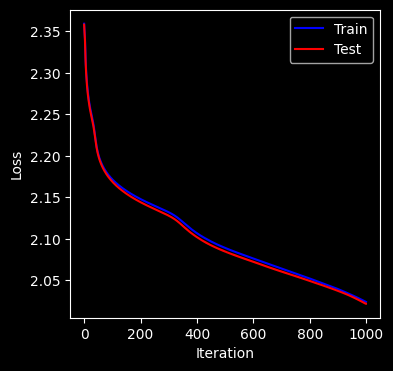

In [128]:
## Plot the training and test loss
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(loss_train, 'b', label = 'Train')
ax.plot(loss_test, 'r', label = 'Test')
ax.set_xlabel('Iteration')
ax.set_ylabel('Loss')
ax.legend();

---

Assess model performance on test data

---

In [129]:
## Assess model performance on test data
Yhat = model(X_test_reshaped_scaled)

ypred = np.array(torch.argmax(Yhat, axis = 1)) # predicted labels for the test samples
ytrue = np.array(torch.argmax(Y_test, axis = 1)) # true labels for the test samples
print('Accuracy on test data = %3.2f'%(np.mean(ytrue == ypred)*100))
# Print confusion matrix
print(confusion_matrix(ytrue, ypred))

Accuracy on test data = 51.74
[[ 871    0    2   37    0    1   68    0    0    1]
 [   0 1064   18    5    0    2   10   25    0   11]
 [  25   18  823   14    0    5  139    1    0    7]
 [  78   12   15  729    0  107   59    1    0    9]
 [  12   60   58   64    0  447  113   36    0  192]
 [  13    2   18  137    0  678   26    4    0   14]
 [ 123   10   93   53    0   12  653    9    0    5]
 [  10  562   85   13    0  142   38   64    0  114]
 [  30   33   18  248    0  441   73   17    0  114]
 [   9   72   51   33    0  460   50   42    0  292]]


Image classified as 5


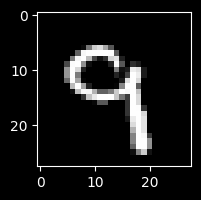

In [133]:
## Plot a random test sample with its predicted label printed above the plot
test_index = np.random.choice(X_test.shape[0])
fig, ax = plt.subplots(1, 1, figsize = (2, 2))
print(f'Image classified as {ypred[test_index]}')
ax.imshow(tf.reshape(X_test_reshaped_scaled[test_index], [28, 28]).numpy(), cmap = 'gray');

---

Define a nonlinear activation layer with ReLU activation

---

In [117]:
class ReLULayer(torch.nn.Module):
    def __init__(self):
        super(ReLULayer, self).__init__()
        self.activation = torch.nn.ReLU()

    def forward(self, input):
        output = self.activation(input)  # Apply softmax activation
        return output

---

Define a one hidden layer neural network model

---

In [118]:
class NeuralNetworkModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_nodes = 2, nodes = 2):
        super(NeuralNetworkModel, self).__init__()
        self.hidden_nodes = hidden_nodes
        self.nodes = nodes
        self.linearLayer1 = LinearLayer(input_dim, self.hidden_nodes)  # 1st Linear layer
        self.actlayer1 = ReLULayer() # 1st activation layer (ReLU)
        self.linearLayer2 = LinearLayer(self.hidden_nodes, self.nodes)  # 2nd Linear layer
        self.softmaxLayer = SoftmaxLayer()  # Softmax activation layer

    def forward(self, input):
        output = self.linearLayer1(input)  # Forward pass through the 1st linear layer
        output = self.actlayer1(output) # ReLU activation
        output = self.linearLayer2(output)  # Forward pass through the 2nd linear layer
        output = self.softmaxLayer(output)  # Apply softmax activation
        return output

---

Perform forward propagation to the toy patient dataset using the NeuralNetworkModel built above.

---

In [121]:
model = NeuralNetworkModel(X_S.shape[1], 4, 3) # 4 nodes in hidden layer
print(model(torch.tensor(X_S, dtype = torch.float32)))

tensor([[0.1012, 0.8747, 0.0242],
        [0.3678, 0.5798, 0.0524],
        [0.0493, 0.7877, 0.1630],
        [0.3530, 0.5790, 0.0681],
        [0.2795, 0.5770, 0.1435],
        [0.2450, 0.7124, 0.0426]], grad_fn=<SoftmaxBackward0>)


<ipython-input-121-7f708048102c>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(model(torch.tensor(X_S, dtype = torch.float32)))


---

Train the 1-hidden layer neural network classifier on the MNIST dataset

---

In [127]:
# This is an exercise## Train the softmax classifier on the MNIST dataset
# Initialize model
model = NeuralNetworkModel(num_features, 4, num_labels)

# Gradient descent
maxiter = 1000
lr = 1e-03

# Define loss function (CrossEntropyLoss in PyTorch includes softmax)
loss_fn = torch.nn.CrossEntropyLoss()

# Define optimizer (RMSprop)
optimizer = torch.optim.RMSprop(model.parameters(), lr = lr)

# Lists to store training and test losses
loss_train = [None] * maxiter
loss_test = [None] * maxiter

# Start training loop
for k in range(maxiter):
    model.train()  # Set model to training mode

    # Forward pass: compute predicted probabilities
    Yhat = model(X_train_reshaped_scaled)  # predicted probabilities

    # Compute training loss
    L_train = loss_fn(Y_train, Yhat)  # CrossEntropyLoss expects raw logits (no softmax needed)

    # Append training and test loss values
    loss_train[k] = L_train.item()  # Convert to scalar
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for testing
        Yhat_test = model(X_test_reshaped_scaled)  # predicted probabilities for test set
        L_test = loss_fn(Y_test, Yhat_test)  # Compute test loss
    loss_test[k] = L_test.item()  # Convert to scalar

    # Print losses
    print(f'Iteration {k+1}, Training loss = {loss_train[k]}, Test loss = {loss_test[k]}')

    # Backward pass: compute gradients
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    L_train.backward()  # Backpropagate the gradients

    # Update model parameters using optimizer
    optimizer.step()  # Perform one optimization step

Iteration 1, Training loss = 2.359372138977051, Test loss = 2.3581950664520264
Iteration 2, Training loss = 2.3530125617980957, Test loss = 2.3515079021453857
Iteration 3, Training loss = 2.3485448360443115, Test loss = 2.3467819690704346
Iteration 4, Training loss = 2.341587781906128, Test loss = 2.339256525039673
Iteration 5, Training loss = 2.3296117782592773, Test loss = 2.327005624771118
Iteration 6, Training loss = 2.3187286853790283, Test loss = 2.3160078525543213
Iteration 7, Training loss = 2.3102314472198486, Test loss = 2.307431697845459
Iteration 8, Training loss = 2.303359270095825, Test loss = 2.300520181655884
Iteration 9, Training loss = 2.297616481781006, Test loss = 2.2947471141815186
Iteration 10, Training loss = 2.292677402496338, Test loss = 2.2897965908050537
Iteration 11, Training loss = 2.2883355617523193, Test loss = 2.2854461669921875
Iteration 12, Training loss = 2.2844502925872803, Test loss = 2.2815651893615723
Iteration 13, Training loss = 2.28092527389526

---

The following sequence of code snippets are mostly derived from Andrej Karpathy's superb tutorial on *Let's build GPT: from scratch, in code, spelled out* available via https://youtu.be/kCc8FmEb1nY?feature=shared

Additional modifications are done to elaborate on the details from Karpathy's tutorial

---

---

Load, print, and look at the Shakespeare dataset

---

In [123]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-12-08 11:25:52--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2024-12-08 11:25:52 (46.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [134]:
# Read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [135]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [136]:
# Let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [137]:
# Here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [138]:
# Create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


---


ChatGPT's tiktoken library

---

In [139]:
# ChatGPTs tiktoken library (codebook size 50257)
!pip install tiktoken
import tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.1 MB/s eta 0:00:00


In [140]:
# Using ChatGPTs tiktoken to tokenize
enc =tiktoken.get_encoding('gpt2')
print(enc.n_vocab)
enc.encode("hii there")

50257


[71, 4178, 612]

In [141]:
# Let's now encode the entire Shakespeare dataset and store it into a torch.Tensor
data = torch.tensor(encode(text), dtype = torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [142]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [143]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [144]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [165]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

---

A quick introduction to embeddings in PyTorch: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

---

In [163]:
emb = torch.nn.Embedding(10,4)
emb
emb.weight
input = torch.LongTensor([[1,3],[5,5]])
print(input)
emb(input)

tensor([[1, 3],
        [5, 5]])


tensor([[[-0.9420, -0.1418,  2.5431, -1.0991],
         [-1.3211, -0.3692, -0.0046,  1.9581]],

        [[-0.9410, -0.1522,  0.1742, -1.4833],
         [-0.9410, -0.1522,  0.1742, -1.4833]]], grad_fn=<EmbeddingBackward0>)

---

Build a simple Bigram model class

---

In [172]:
emb= torch.nn.Embedding(65,65)
emb(xb).shape
# emb(xb)

torch.Size([4, 8, 65])

In [174]:
xb

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

In [175]:
yb

tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])

In [173]:
emb= torch.nn.Embedding(65,65)
T = emb(xb)
T[0,0,:]

tensor([-0.4288,  0.9174,  0.7843,  0.9944, -0.2693, -0.9706,  0.6682, -1.2371,
        -0.1279, -0.5237,  0.8821, -1.0130, -1.3017,  0.5728, -1.0267,  0.5128,
         2.8340, -0.8991,  1.9791,  0.1187, -0.8696,  0.3010, -0.8921,  1.0314,
         1.1101,  0.2019,  1.1272, -0.1387, -1.2324, -0.3435,  1.1828, -1.1266,
         0.1003,  0.9391, -0.4941,  1.0841, -1.4850,  2.2035, -0.2034,  0.9101,
        -2.4893,  1.7413,  0.5102, -2.6755, -0.2316,  1.2472,  0.1332,  1.3809,
        -1.4396,  0.0324, -0.6490,  1.0231, -0.5780, -1.5587, -1.8142, -0.1949,
        -0.1895, -0.4669,  0.0115,  0.2671,  1.5299, -0.6339,  1.6854, -1.2475,
        -0.1250], grad_fn=<SliceBackward0>)

In [178]:
torch.manual_seed(1337)

class BigramLanguageModel(torch.nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = torch.nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = torch.nn.functional.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = torch.nn.functional.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


---


Train the bigram model

---

In [147]:
# Optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

batch_size = 32
for steps in range(10000): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

2.5727508068084717


---

Generate next set of tokens using the trained Bigram model

---

In [148]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


Iyoteng h hasbe pave pirance
Rie hicomyonthar's
Plinseard ith henoure wounonthioneir thondy, y heltieiengerofo'dsssit ey
KIN d pe wither vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h hay.JUCle n prids, r loncave w hollular s O:
HIs; ht anjx?

DUThinqunt.

LaZAnde.
athave l.
KEONH:
ARThanco be y,-hedarwnoddy scace, tridesar, wnl'shenous s ls, theresseys
PlorseelapinghiybHen yof GLUCEN t l-t E:
I hisgothers je are!-e!
QLYotouciullle'z


---

Basics of the self attention model

---

In [149]:
torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

---

Attention using averages

---

In [150]:
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)
xbow.shape

torch.Size([4, 8, 2])

---

Weighted averages using matrix multiplication

---

In [151]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
xbow2.shape

torch.Size([4, 8, 2])

---

Weighted averages using softmax

---

In [152]:
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = torch.nn.functional.softmax(wei, dim=-1)
xbow3 = wei @ x
xbow3.shape

torch.Size([4, 8, 2])

---

The self attention block

---

In [153]:
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = torch.nn.Linear(C, head_size, bias=False)
query = torch.nn.Linear(C, head_size, bias=False)
value = torch.nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = torch.nn.functional.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
out = wei @ x

out.shape

torch.Size([4, 8, 32])